In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
from scipy import stats

### 1. Why is assuming normal data an important consideration when answering questions about probability?

It applies to more real world situations than the other distrubutions (discrete and continuous), and many statistical methods rely on it.

In [4]:
belize_listing = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listing)
belize_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
6,124794,Sabal Beach - secluded eco-retreat,562206,David & Wayne,Toledo,Toledo Mainland,16.28752,-88.54550,Entire home/apt,232,3,18,1/12/2020,0.16,2,338
7,152512,"Stunning one br apt-kitchen, air con, bikes & ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.52644,-88.37000,Entire home/apt,165,7,64,2/10/2021,0.57,5,298
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.25395,-88.76870,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.16261,-89.06995,Private room,286,1,40,2/3/2020,0.47,8,362


### 2. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data

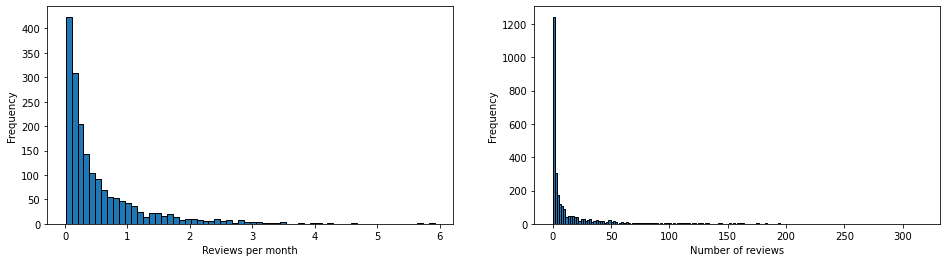

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].hist(belize_df["reviews_per_month"], bins = 'auto', edgecolor = 'Black')
ax[0].set_xlabel("Reviews per month")
ax[0].set_ylabel("Frequency")

ax[1].hist(belize_df["number_of_reviews"], bins = 'auto', edgecolor = 'Black')
ax[1].set_xlabel("Number of reviews")
ax[1].set_ylabel("Frequency")
plt.show()

### 2a.	How do you choose your bin size?

Bins was set to auto to have python decide how to bin the data points. Auto created smaller intervals which provided a more detailed look at teh distribution of reviews per month and number of reviews.

### 3. Create a box and whisker plot for availability_365. What does this show you?

The box and whisker plot shows that measures of spread. The minimum days available for the airbnbs, excluding outliers, shown at the end of the left whisker. The distribution is negatively skewed (left-skew), with the median being closer to the top of the box, and the whisker being shorter on the upper end of the box.

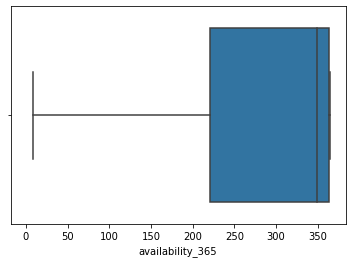

In [6]:
import seaborn as sns
ax = sns.boxplot(x=belize_df['availability_365'], fliersize = False)

###  4. What is the probability that the price for an Airbnb is under $50?

The probability that the price of an airbnb is under $50 is 29%

In [7]:
from scipy.stats import norm

belize_df['price'].mean() # the mean = 357
statistics.stdev(belize_df['price']) # the sd = 563

prob_less_than_50 = norm.cdf(50, 357, 563)
print(prob_less_than_50)

0.2927759838151833


### 4a.	What do you notice about these records? Hint: look at the other columns.

The records are either left or right skewed which means that the median would be better to use as a measure of center. 

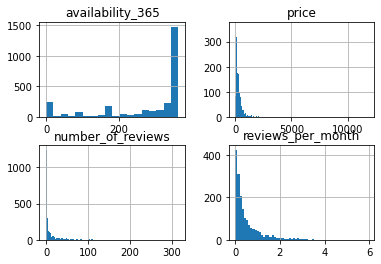

In [39]:
belize_df[["availability_365", "price", "number_of_reviews", "reviews_per_month"]].hist(bins = 'auto')
plt.show()

### 4b.	What distribution does this data most closely fit?

The data for price most closely fits a discrete distribution that is right-skewed.

### 5. Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

In [20]:
belize_df.agg([np.std,np.var])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157


### 5a. Why sample variance and not population variance?

This is sample data, so it is better to use sample variance to make inferences about the population variance. It's more useful when you don't have a full population.

### 5b. What is your takeaway for each metric?

The standard deviation and variance was not needed for certain columns (id, host_id). 

### 5c. What are the scales of measurement for each of these values?
#### Nominal Level  - Categories (qualitative data) without any order. Examples: Brand names, countries, colors
#### Ordinal level - Categories that can be ordered (from low to high), but the precise "distance" between each is not meaningful.Examples: Letter grade scales from F to A Military ranks
#### Interval - Data that can be ordered and the distance between them is objectively meaningful. But there is no natural 0-value where the scale originates. Examples: Years in a calendar, Temperature measured in fahrenheit
####  Ratio - Data that can be ordered and there is a consistent and meaningful distance between them. And it also has a natural 0-value. Examples:  Money, Age, Time

id - ordinal

host_id - ordinal

latitude and longitude - interval or ratio

price - ratio	

minimum_nights - interval

number_of_reviews - nominal

reviews_per_month - ordinal 

calculated_host_listings_count - ordinal

availability_365 - interval


### 6. What percent of Airbnb listings in Belize are available 360 days a year or more?

About 26% of the airbnb listings are available 360 days a year or more

In [10]:
#find the mean of availability_365
belize_df["availability_365"].mean() # 280

#find the sd of availability_365
statistics.stdev(belize_df["availability_365"]) #121

# find the percentage of listings available 360 days a year or more 
more_available = 1 - norm.cdf(359, 280, 121)
print(more_available)

0.25691277222906184


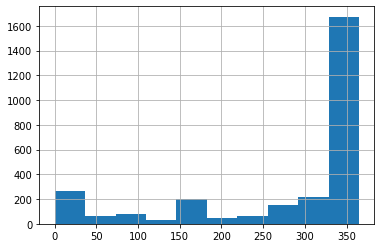

In [11]:
# visualizing the distribution of the availability.
belize_df["availability_365"].hist()
plt.show()

### 6a.	360 days or less?

About 75% of listings are available 360 days a year or less

In [12]:
# find the percentage of listings available less than 360 days a year or less 
less_available = norm.cdf(360, 280, 121)
print(less_available)

0.7457441909092201


### 6b.	What distribution does this data most closely fit?

This most closely fits a discrete distribution and it is left-skewed

### 7. What minimum night count are 75% of Airbnb listing in Belize greater than?
 
 75% of the airbnb listings are above 3 minimum night counts

In [13]:
# find the mean and sd of minimum nights
belize_df['minimum_nights'].mean() # the mean is 2.26
statistics.stdev(belize_df['minimum_nights']) # sd is ~6

# find the percentage of of
pct_75 = norm.ppf((1-0.75), 2.26, 6)
print(pct_75)

#try np.quartiles or box plot for min, nights in belize


-1.7869385011764907


In [28]:
print(np.quantile(belize_df['minimum_nights'], [0, 0.25, .50, 0.75, 1]))

print(np.quantile(belize_df['minimum_nights'], .75))

[  1.   1.   2.   3. 180.]
3.0


### The Monty Hall problem

You're asked choose one of three doors; one door has a prize while the other two do not. The door you picked is not opened right away; Monty opens one of the two doors with no prize. You can choose to switch doors or keep your initial choice. If you switch doors, there's a higher chance of winning due to one of the doors  he doesn't open has a 66% chance of having the prize.

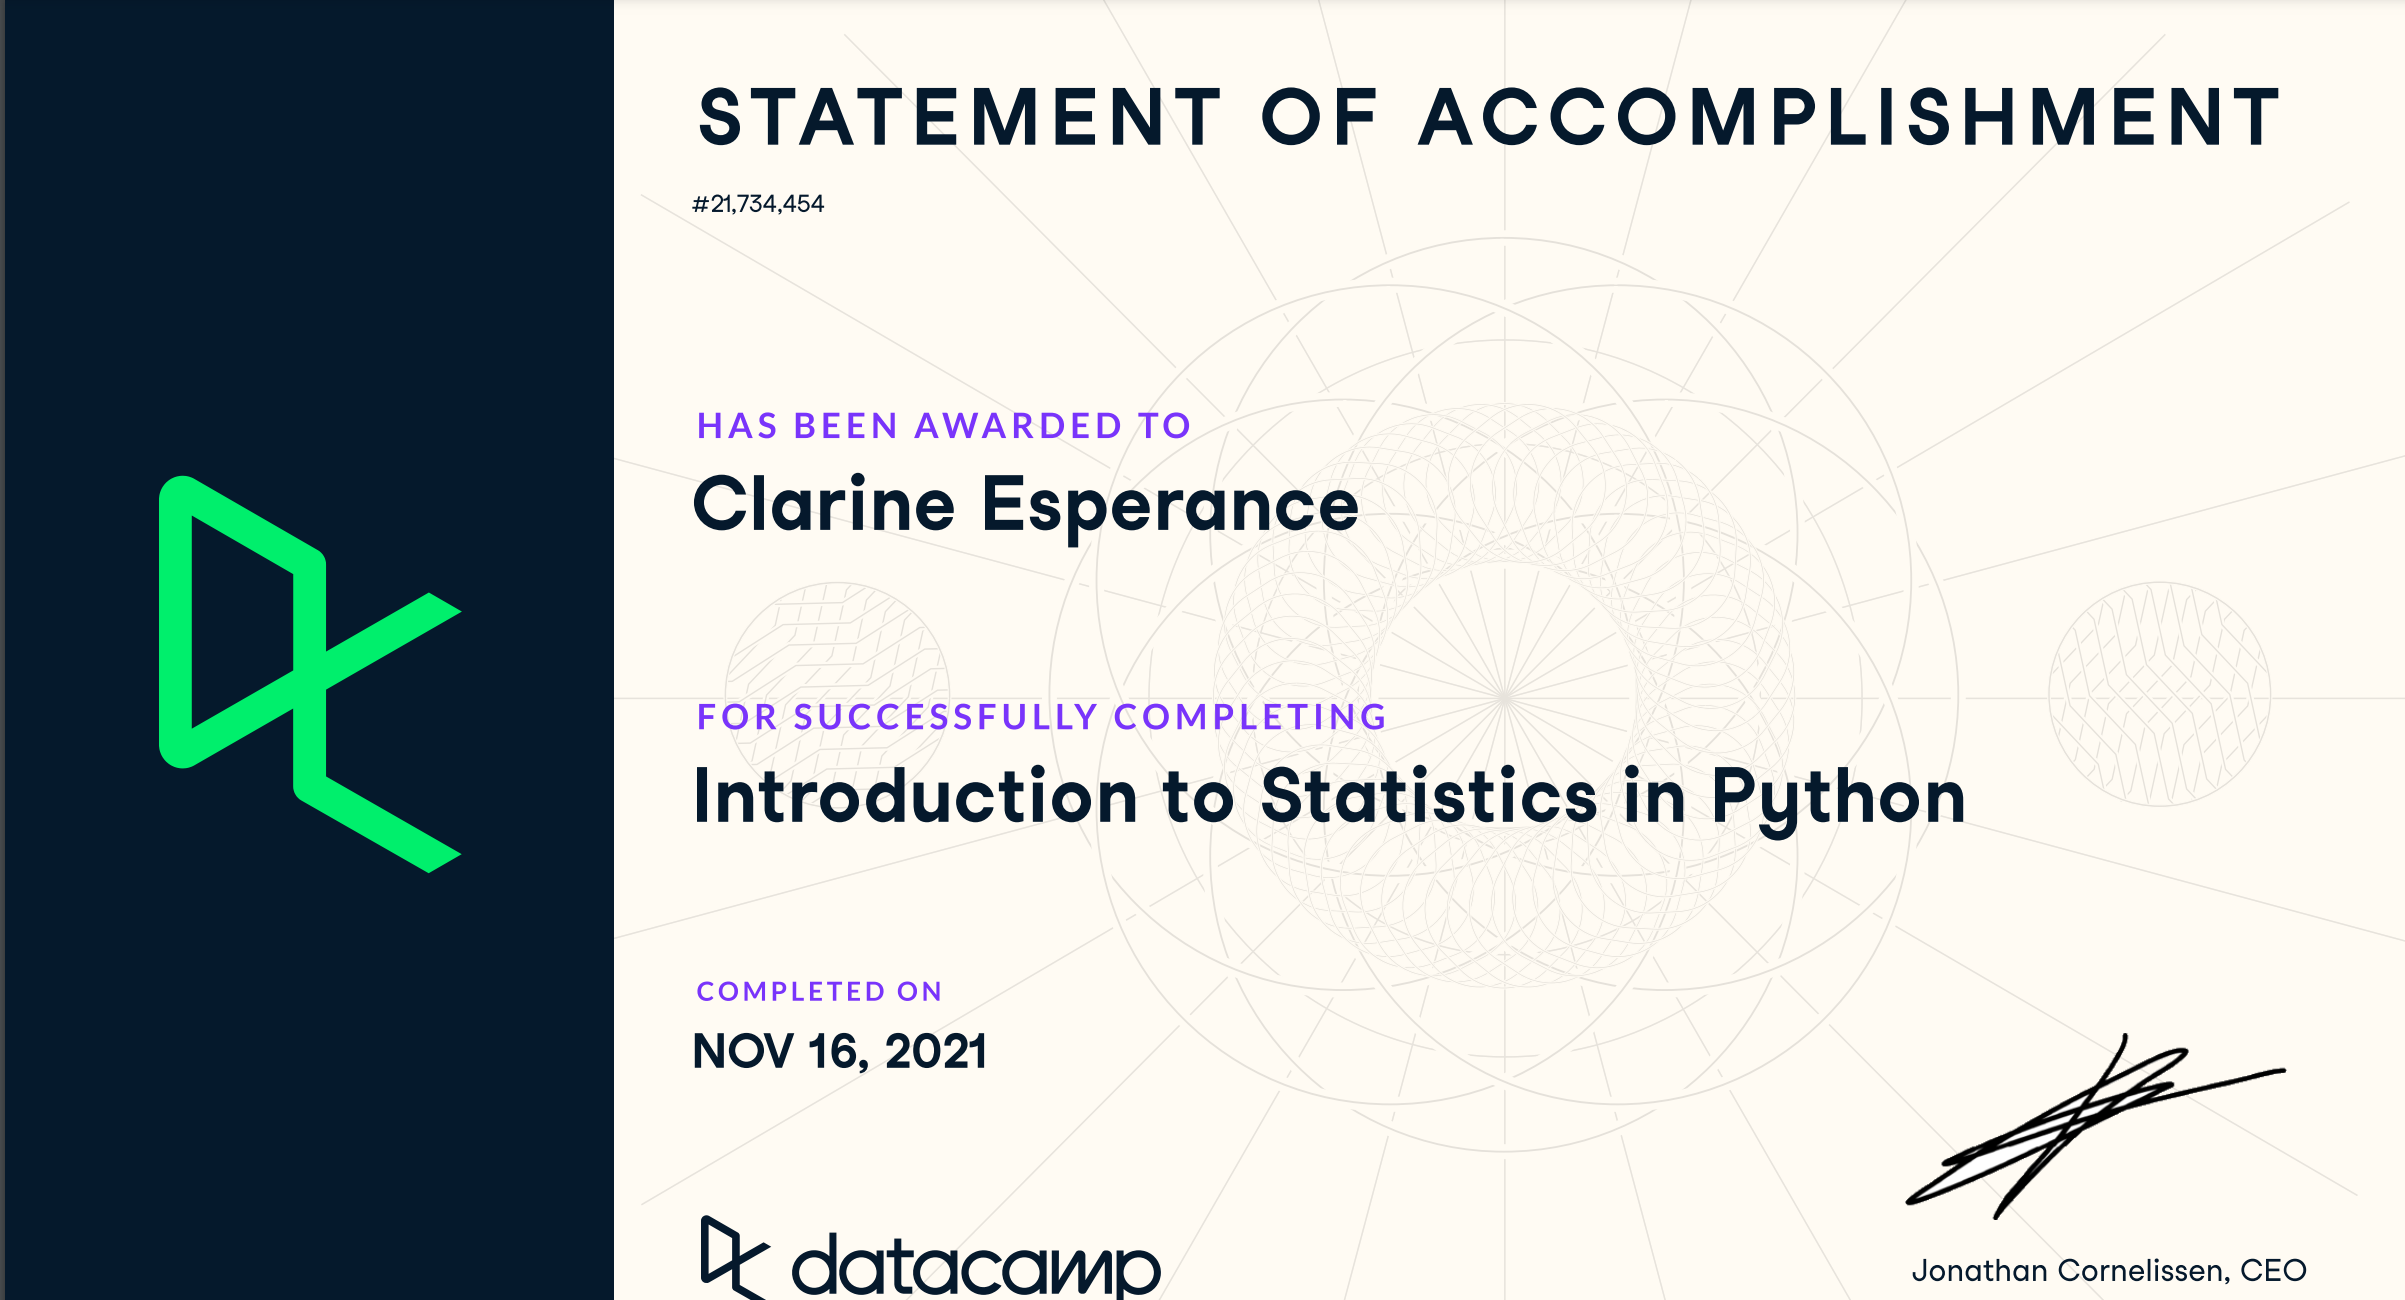